<div align="center">

# Social Graphs and Interactions 02805


## Assignment 1


#### Group 48 

**Made By:**  
Nicklas Thorvald Kiær, s216137\
Alexander Vaaben, \
Oliver Brandt,


*30/10/2025*

---

</div>


# Assignment 1.1: Exploring WS and BA models

### Question 1:
##### **What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

Section 3.5 decribes the idea of so called "hubs". Hubs represent a single node with an amount of links that drastically exceedes the average number of links. This is not represented in the Erdos random networks, but occurs often in the real world networks we examine. An example of a hub mentioned in the book is Franklin Delano Roosevelt (FDR), who was known to have above 22000 connections, with people he met in real life. This is wildly above the average person. And is not represented in the random network.

### Question 2

##### **List the four regimes that characterize random networks as a function of ⟨k⟩.**

The four regimes are **subcritical**, **supercritical**, **critical** and **connected**, which all have different characteristics.
- subcritical\
The subcritical regime is characterized by having a large amount of smaller groups. This means there is no "winner" in the clusters, refering to the compared size of the component (no giant component). For this regime ⟨k⟩ is in the span from 0-1. Expressed: $0 < ⟨k⟩ < 1$

- supercritical\
Opposite of the subcritical, the supercritical regime describes a network that has a clear "winner", a giant component that captures most of the network.\
This occures when ⟨k⟩ is larger than 1. $⟨k⟩ > 1$.

- critical\
The critical point still has no recognizable giant component. And is still split into a large amount of smaller clusters. It has the ⟨k⟩ value equel to one. $⟨k⟩ = 1$

- connected\
The connected regime means that all nodes are connected. This means that the Giant components has access to all nodes, and there are no other clusters. In this regime ⟨k⟩ is larger than $ln N$ where $N$ is the amount of nodes, $⟨k⟩ > ln N$

### Question 3

##### **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?**

In real-world networks, high-degree nodes (hubs) often have a higher clustering coefficient because they connect to many nodes that are also interconnected. In random networks, however, the clustering coefficient decreases with increasing degree, which does not reflect the structure observed in real-world networks.

### Question 4

##### **WS Edition: First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  p=0,0.1, and 1. Calculate the average shortest path length ⟨d⟩ for each one.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import networkx as nx

In [6]:
ws1 = nx.watts_strogatz_graph(500, 4, 0)
ws2 = nx.watts_strogatz_graph(500, 4, 0.1)
ws3 = nx.watts_strogatz_graph(500, 4, 1)

print("ws1:", nx.average_shortest_path_length(ws1))
print("ws2:", nx.average_shortest_path_length(ws2))
print("ws3:", nx.average_shortest_path_length(ws3))


ws1: 62.875751503006015
ws2: 7.256937875751503
ws3: 4.763935871743487


Three WS graphs were created with average degree 4 and rewiring probabilities 0, 0.1, 1.
The average shortest path lenghts were found to be:
62.88 for the graph with rewiring probability 0. 
7.26 for the graph with rewiring probability 0.1.
4.76 for the graph with rewiring probability 1.

### Question 5
##### **Describe what happens to the network when $p = 1$**
When p = 1, the network becomes a random graph, thereby losing its small-world properties. The average shortest path length decreases, and the clustering coefficient also drops, indicating a lack of local clustering.

### Question 6
##### **Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when  p=0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.**
After trying multiple different values of p. We see that the value of p where the average shortest path length gets to close to that of a fully randomized network is around 0.1.

### Question 7

##### **Let's investigate this behavior in detail. Generate 50 networks with  N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).**

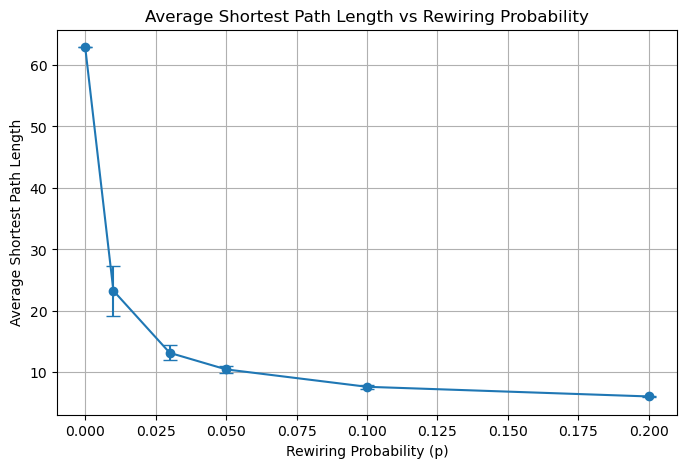

In [14]:
ps_detailed = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
means = []
stds = []

# Get the values for each of the different p vals
for p_val in ps_detailed:
    lengths = []
    # Do it 50 times
    for _ in range(50):
        ws = nx.watts_strogatz_graph(500, 4, p_val)
        lengths.append(nx.average_shortest_path_length(ws))
    means.append(np.mean(lengths))
    stds.append(np.std(lengths))

plt.figure(figsize=(8, 5))
plt.errorbar(ps_detailed, means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.grid(True)
plt.show()

*The plot shows how the average shortest path length in a Watts-Strogatz network changes as the rewiring probability \( p \) increases. Each point represents the mean shortest path length calculated from 50 generated graphs for a given \( p \) value. The error bars indicate the standard deviation of these 50 measurements. Smaller error bars means that a result was more consistant across the 50 iterations, and larger means more variation.*

### Question 8

##### **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**

- Anomalous regime (y <= 2):\
The network has a giant component, and the average shortest path length scales logarithmically with the number of nodes. The network is robust to random failures but vulnerable to targeted attacks on hubs.

- Scale-free regime (2 < γ < 3):\
The network exhibits scale-free properties, with a power-law degree distribution. The average shortest path length scales logarithmically with the number of nodes, and the network is robust to random failures but vulnerable to targeted attacks on hubs.

- Random regime (γ > 3):\
The network behaves more like a random graph, with a Poisson degree distribution. The average shortest path length scales logarithmically with the number of nodes, and the network is less robust to both random failures and targeted attacks.



### Question 9

##### **What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**

- Sublinear regime (0 < α < 1):\
The network grows slower than linearly, leading to a more homogeneous degree distribution. The network is less likely to form hubs, and the average shortest path length increases more rapidly with the number of nodes.

- Linear regime (α = 1):\
The network grows linearly, resulting in a scale-free degree distribution. Hubs form, and the average shortest path length scales logarithmically with the number of nodes.

- Superlinear regime (α > 1):\
The network grows faster than linearly, leading to the emergence of a few dominant hubs. The average shortest path length decreases, and the network becomes more centralized around these hubs.

### Question 10-15

##### **Parts:**
- First create a graph consisting of a single link.\
- Now add another node, connecting one of the existing nodes in proportion to their degree.\
- Keep going until you have a 100 node network.\
- Plot the network. Add more nodes until you have a 5000 node network.

In [ ]:
#Graph with a single link
G = nx.Graph()
G.add_edge(0, 1)

#Adding nodes using preferential attachment until there are x nodes
nodes = 5000
while G.number_of_nodes() < nodes:
    new_node = G.number_of_nodes()
    degrees = np.array([G.degree(n) for n in G.nodes()])
    probs = degrees / degrees.sum()
    existing_node = np.random.choice(G.nodes(), p=probs)
    G.add_edge(new_node, existing_node)

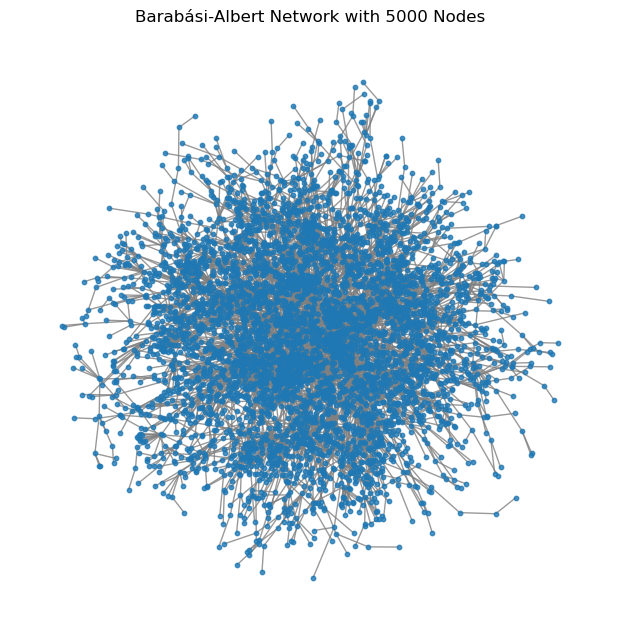

In [24]:
# Plotting the graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=10, node_color='#1f78b4', edge_color='gray', alpha=0.8, with_labels=False)
plt.title(f'Barabási-Albert Network with {nodes} Nodes')
plt.show()

*Plot of the network created for question 15, with 5000 nodes*

Maximum degree: 155
Minimum degree: 1


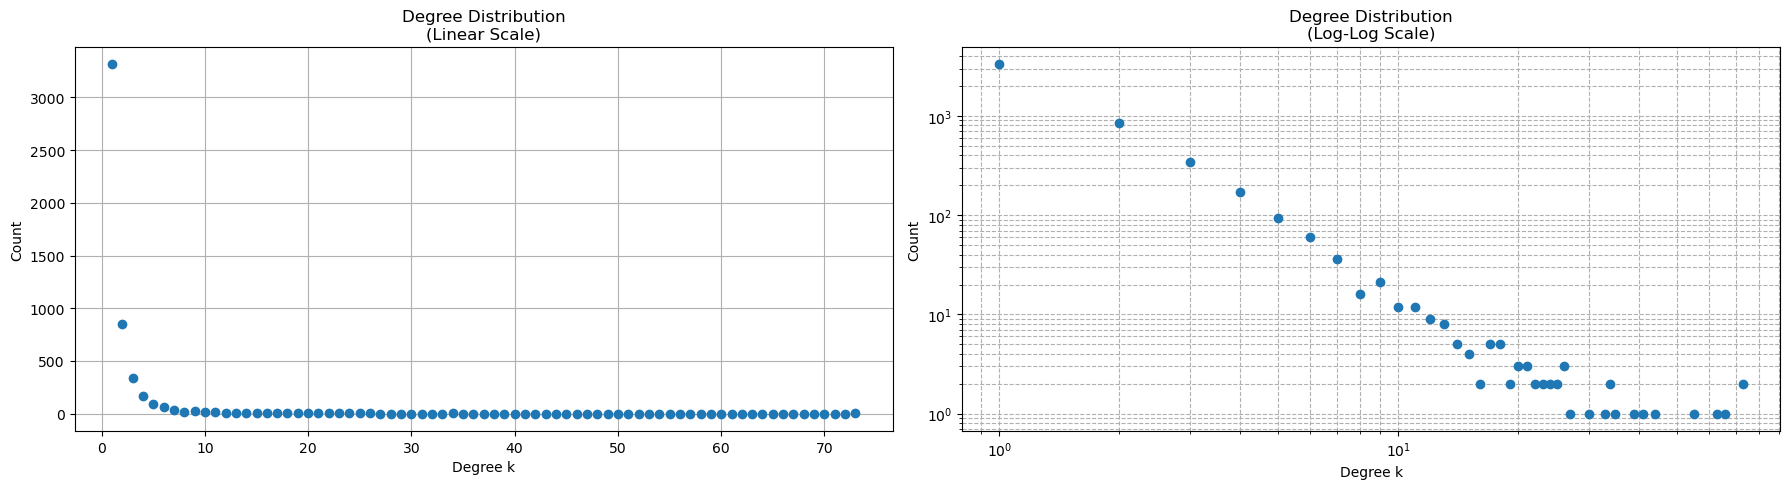

In [23]:
#Maximum and minimum degree
degrees = [G.degree(n) for n in G.nodes()]
print("Maximum degree:", max(degrees))
print("Minimum degree:", min(degrees))
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(k, degree_counts[1:], marker='o', linestyle='None')
axes[0].set_xlabel('Degree k')
axes[0].set_ylabel('Count')
axes[0].set_title('Degree Distribution\n(Linear Scale)')
axes[0].grid(True)

axes[1].loglog(k, degree_counts[1:], marker='o', linestyle='None')
axes[1].set_xlabel('Degree k')
axes[1].set_ylabel('Count')
axes[1].set_title('Degree Distribution\n(Log-Log Scale)')
axes[1].grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

*The plots indicate that there are few nodes with very high degree, and many nodes with low degree. It is evident that it follows the power-law distribution because of the linear trend in the log-log plot.*

# Assignment 1.2: Stats and visualization of the Rock Music Network


### Question 1

##### **Explain your process in words.**

- Step 1: Retrieving initial performer list.\
The first step was to get the full list of all of the rock performers. This was done by querying the wiki page List_of_mainstream_rock_performers. And by analyzing this page, we could gain further information.

- Step 2: Downloading individual performer pages.\
The second stage was to get and save the source data from each of the performers linked on the initial page. This was done using a script that took the list of performers, extracted the link for each of the performers, then querying the wiki api of each of the artists, then saving the data for them all in a list, and finally writing the contents of that list to files in a directory in the workspace. In the end we were left with a directory, of a textfile per artist, containing the contents of thier wiki page. This enables faster compilation and run times for the following scripts, and an ease of load for the wikipedia servers.

- Step 3: Extracting outgoing connections from wiki pages.\
We now needed to extract all of the links that go to another artist in the list. This was done using regex for recognizing links, then comparing the contents of that link with the list of artists. And finally creating an edge representing the link from that artist to the linked one. In the end we now had a graph resembling the network of rock musicians on wikipedia, and their connections. 

- Step 4: Cleanup.\
Finally we discarded all of the nodes that had 0 connections, aswell as some nodes that are not artists, but rather concepts "AllMusic" and "rock_music". This now left us with a network graph showing the connections of the artist pages. 

### Question 2

##### 

In [26]:
import os
import re

artist_dir = 'artists'
artist_files = [f for f in os.listdir(artist_dir) if f.endswith('.txt')]
artist_names = [os.path.splitext(f)[0] for f in artist_files]
artist_set = set(artist_names)

G = nx.DiGraph()
G.add_nodes_from(artist_names)

wiki_url_pattern = re.compile(r'https?://en\.wikipedia\.org/wiki/([^\s\]#]+)')

for filename in artist_files:
    artist = os.path.splitext(filename)[0]
    filepath = os.path.join(artist_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as f:
        wikitext = f.read()
    # Only use the main body (before references/external links)
    main_body = wikitext.split('==')[0]
    # Find all internal wiki links
    links = re.findall(r'\[\[(.*?)\]\]', main_body)
    for link in links:
        target = link.split('|')[0].strip().replace('/', '_').replace(' ', '_')
        if target in artist_set and target != artist:
            G.add_edge(artist, target)

print(f"Directed graph (internal wiki links, main body only): {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Directed graph (internal wiki links, main body only): 490 nodes, 631 edges


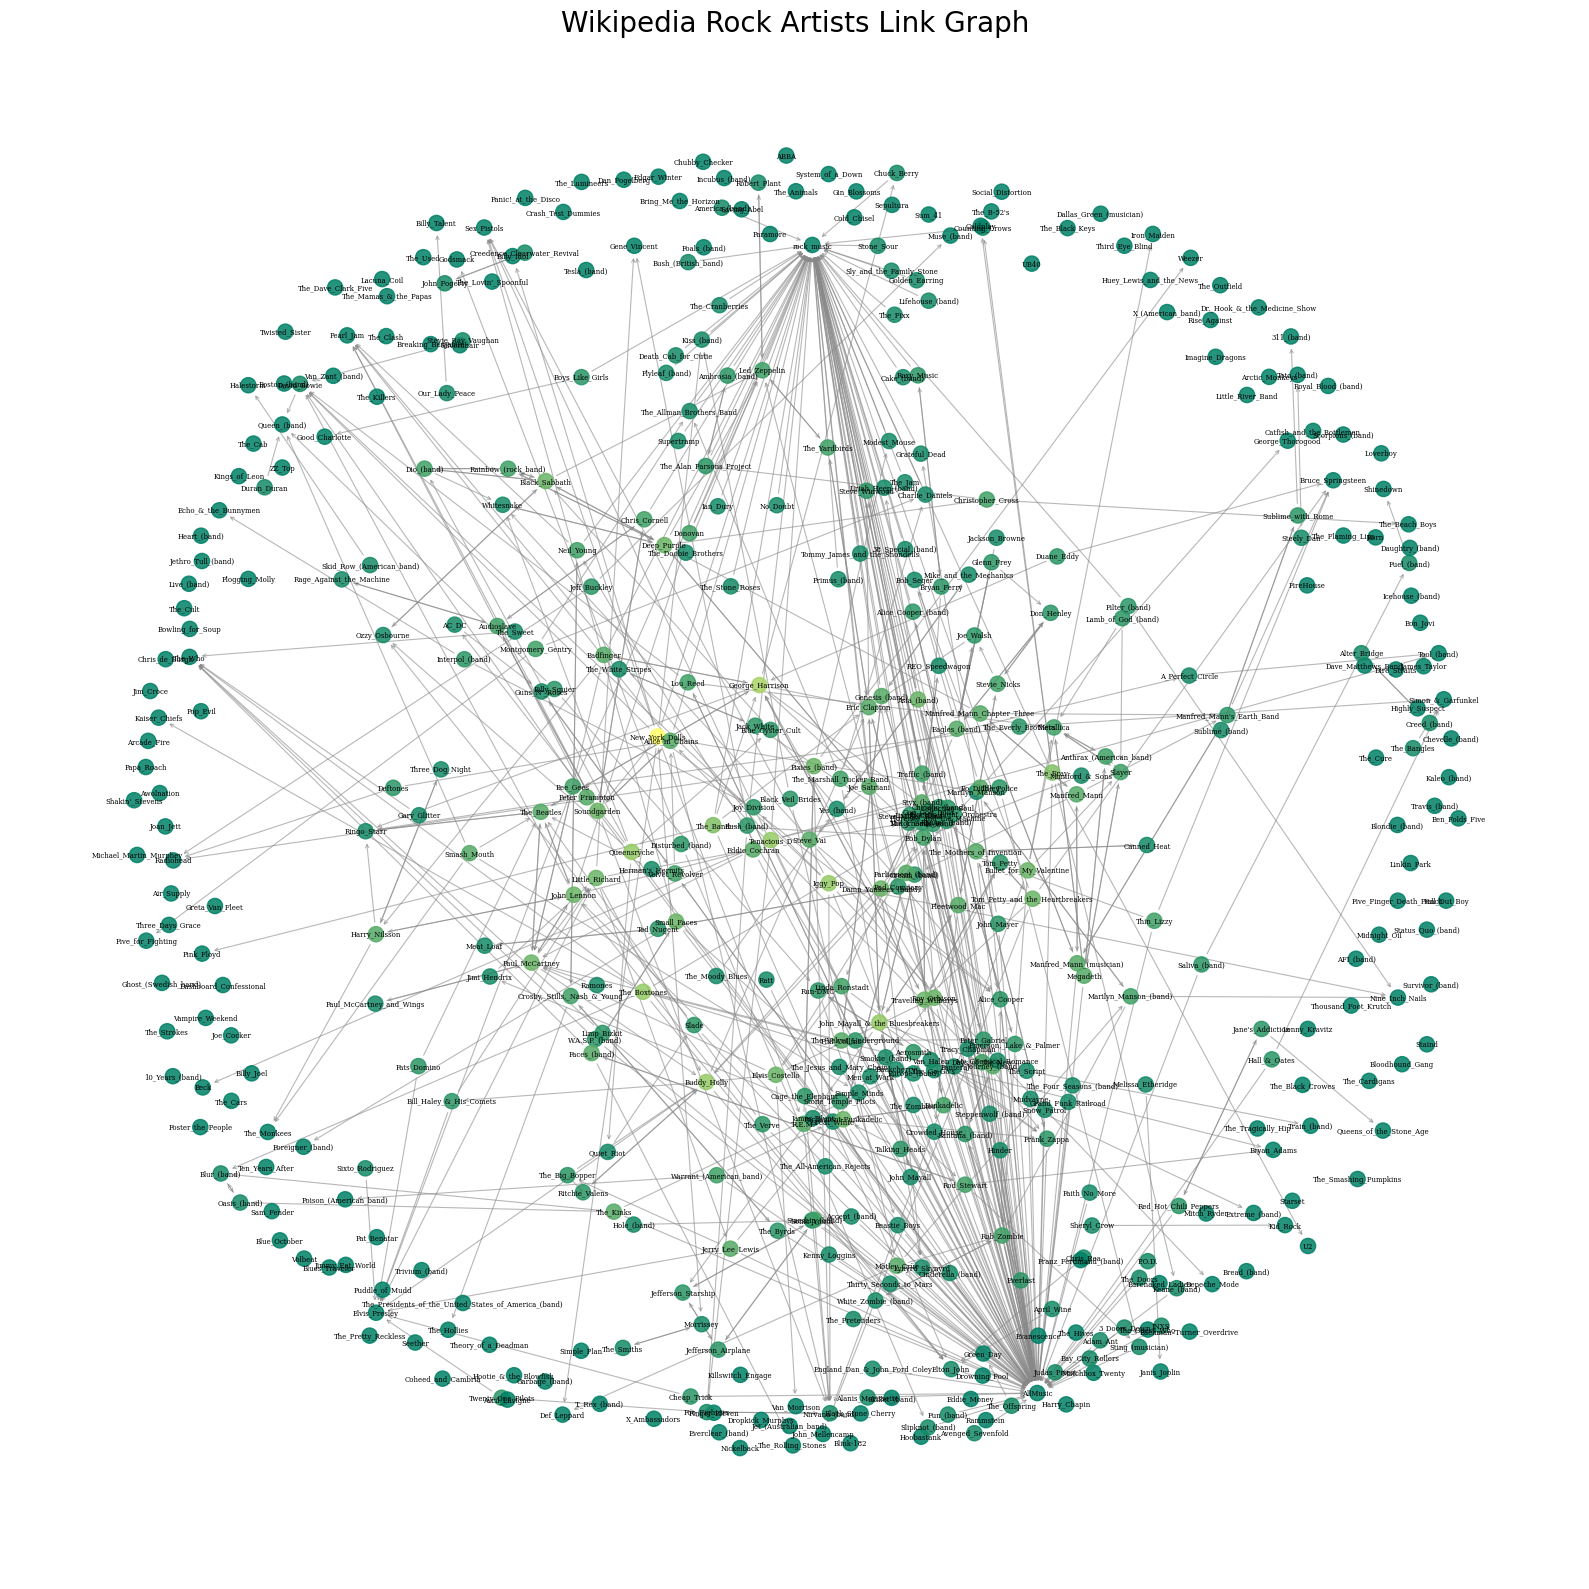

In [27]:
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G, k=0.18, seed=42)
node_colors = [len(list(G.successors(n))) for n in G.nodes()]
edge_colors = '#888888'
nx.draw_networkx_nodes(G, pos, node_size=120, node_color=node_colors, cmap=plt.cm.summer, alpha=0.85)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=6, edge_color=edge_colors, width=.8, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=5, font_family='serif', font_color='black')
plt.title("Wikipedia Rock Artists Link Graph", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

Number of active nodes: 336
Graph without isolates (and 'rock_music', 'AllMusic' removed): 334 nodes, 449 edges


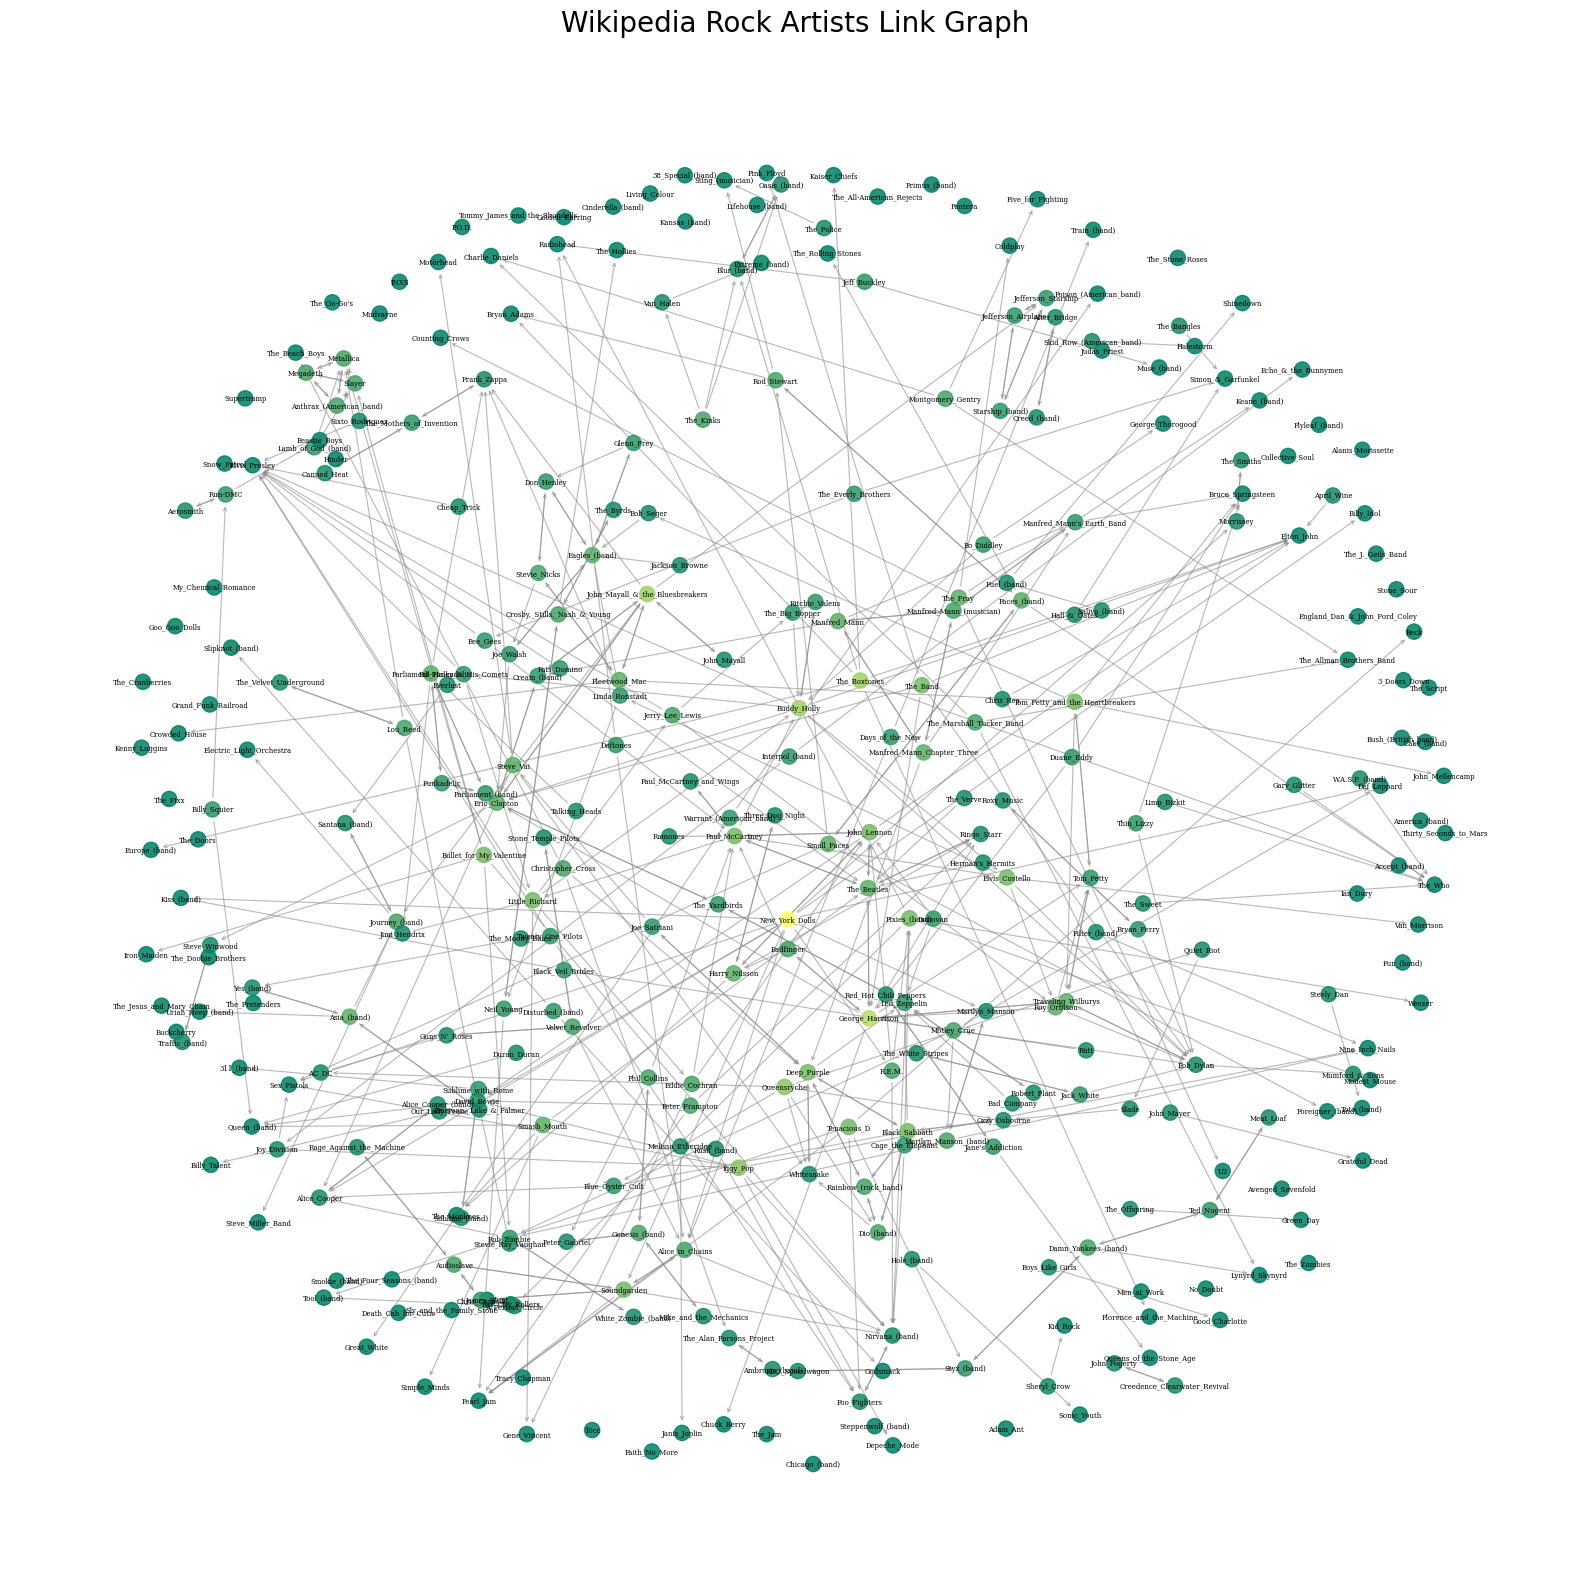

In [28]:
# Find nodes with degree 0 (no in-edges and no out-edges)
active_nodes = [node for node in G.nodes() if G.degree(node) > 0]

# Create a new graph excluding isolated nodes
G_clean = G.subgraph(active_nodes).copy()
# G_clean.remove_nodes_from(isolated_nodes)
G_clean.remove_nodes_from(["rock_music", "AllMusic"])

print(f"Number of active nodes: {len(active_nodes)}")
print(f"Graph without isolates (and 'rock_music', 'AllMusic' removed): {G_clean.number_of_nodes()} nodes, {G_clean.number_of_edges()} edges")

plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G_clean, k=0.18, seed=69)
node_colors = [len(list(G_clean.successors(n))) for n in G_clean.nodes()]
edge_colors = '#888888'
nx.draw_networkx_nodes(G_clean, pos, node_size=120, node_color=node_colors, cmap=plt.cm.summer, alpha=0.85)
nx.draw_networkx_edges(G_clean, pos, arrowstyle='->', arrowsize=6, edge_color=edge_colors, width=.8, alpha=0.6)
nx.draw_networkx_labels(G_clean, pos, font_size=5, font_family='serif', font_color='black')
plt.title("Wikipedia Rock Artists Link Graph", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
degrees_dict = {node: (G_clean.in_degree(node), G_clean.out_degree(node)) for node in G_clean.nodes()}
# Top 5 nodes with highest in-degree
top_in = sorted(degrees_dict.items(), key=lambda x: x[1][0], reverse=True)[:5]
print("Top 5 in-degree:")
for node, (d_in, d_out) in top_in:
    print(f"{node}: in={d_in}, out={d_out}")

# Top 5 nodes with highest out-degree
top_out = sorted(degrees_dict.items(), key=lambda x: x[1][1], reverse=True)[:5]
print("\nTop 5 out-degree:")
for node, (d_in, d_out) in top_out:
    print(f"{node}: in={d_in}, out={d_out}")


Top 5 in-degree:
Bob_Dylan: in=10, out=1
Elvis_Presley: in=9, out=0
Paul_McCartney: in=9, out=5
Nirvana_(band): in=8, out=1
The_Beatles: in=8, out=4

Top 5 out-degree:
New_York_Dolls: in=0, out=11
George_Harrison: in=6, out=8
The_Boxtones: in=0, out=7
Buddy_Holly: in=5, out=7
John_Mayall_&_the_Bluesbreakers: in=4, out=7


In [30]:
# Get the weakly connected components of the directed graph G
weakly_connected_components = list(nx.weakly_connected_components(G_clean))
print(f"Number of weakly connected components: {len(weakly_connected_components)}")
# Example: print the size of the largest component
largest_component = max(weakly_connected_components, key=len)
print(f"Largest component size: {len(largest_component)}")

Number of weakly connected components: 80
Largest component size: 230


In [31]:
# Get the strongly connected components of the directed graph G
strongly_connected_components = list(nx.strongly_connected_components(G_clean))
print(f"Number of strongly connected components: {len(strongly_connected_components)}")
# Example: print the size of the largest strongly connected component
largest_scc = max(strongly_connected_components, key=len)
print(f"Largest strongly connected component size: {len(largest_scc)}")


Number of strongly connected components: 244
Largest strongly connected component size: 36
